# Minimal example of running OceanTracker 

Main steps are 

    1. build parameter dictionary

    2. run oceantracker with the parameter dictionary

    3. plot results

This example is part of a a 3D Schisim model, where particles always resupend if the land on the bottom. Particles stranded by the falling tide in dry cells are frozen, until the cell becomes wet.  

In [1]:
# build a dictionary of parameters using code
params={'output_file_base' :'minimal_example', # name used as base for output files
        'root_output_dir':'output',             #  output is put in dir   'root_output_dir'\\'output_file_base'
        'reader_class':{'input_dir': '..\\demos\\demo_hindcast',  # folder to search for hindcast files, sub-dirs will, by default, also be searched
                        'file_mask': 'demoHindcastSchism*.nc',    # the file mask of the hindcast files
                        },
        # add  release locations from two points, 
        #       particle_release_groups are a list of one or more release groups 
        #               (ie locations where particles are released at the same times and locations) 
        'particle_release_groups_list': 
                      [{'points':[[1595000, 5482600],
                                  [1599000, 5486200]],      # must be an N by 2 or 3 or list, convertable to a numpy array
                        'release_interval': 3600,           # seconds between releasing particles
                        'pulse_size': 10,                   # number of particles released each time
                        }
                       ],  
        # the above are required parameters, below are optional
        'time_step' : 120 #  2 min time step  as seconds                        
        }

#  Run Ocean tracker

Note: the run_info_file_name returned helps with reading output, run_info file is a json that has information on all the cases and output file names

In [2]:
# run oceantracker
from oceantracker.main import OceanTracker

OT = OceanTracker(params) # make an instance with given parameters
run_info_file_name, has_errors= OT.run()

# output files are now in folder .\\output\\minimal_example
# run_info_file_name is the name of a json file useful in reading and plotting output


M: --------------------------------------------------------------------------
M: OceanTracker preliminary setup
M: --------------------------------------------------------------------------
M: Running OceanTracker started 2023-05-02 09:06:02.037383
M:   - Starting: minimal_example
M: --------------------------------------------------------------------------
M: Starting OceanTracker  Version 0.4.00.003 2023-04-27
M:   Python version: 3.10.8 | packaged by conda-forge | (main, Nov 24 2022, 14:07:00) [MSC v.1916 64 bit (AMD64)]
M:   - found hydro-model files of type SCHISIM
M:       -  done: sorting hyrdo-model files in time order,		  0.600 sec
M:       -  done: building node to triangles map,		  1.056 sec
M:       -  done: building triangle adjacency matrix,		  0.272 sec
M:       -  done: finding boundary triangles,		  0.000 sec
M:       -  done: building domain and island outlines,		  2.868 sec
M:       -  done: calculating triangle areas,		  0.000 sec
M:   - Input directory: ..\demos\de

In [3]:
# write params to build on for later examples
import json
with open('.\\example_param_files\\A_minimal_example.json','w') as f: 
    json.dump(params, f) 

import yaml
with open('.\\example_param_files\\A_minimal_example.yaml','w') as f: 
    yaml.dump(params, f)

# Read and plot output

  A first basic plot of particle tracks

caseinfo file= e:\OneDrive - Cawthron\H_Local_drive\ParticleTracking\oceantracker\tutorials_how_to\output\minimal_example\minimal_example_caseInfo.json
dict_keys(['dimensions', 'total_num_particles_released', 'status', 'x0', 'IDpulse', 'time', 'IDrelease_group', 'dry_cell_index', 'x', 'z', 'grid', 'particle_status_flags', 'particle_release_group_info', 'full_case_params', 'axis_lim'])


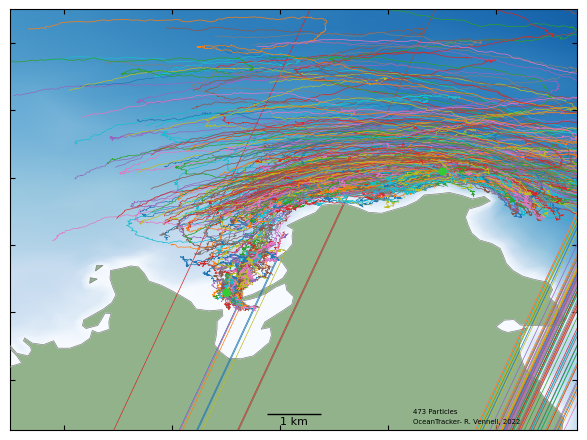

In [4]:
# read output files

from oceantracker.post_processing.read_output_files import  load_output_files

# use run info file, to get name of file with detailed information about the single case from case_info json file,
#   this case_info file holds all the output file names pls lots of other run info

case_info_file_name  = load_output_files.get_case_info_file_from_run_file(run_info_file_name)
print('caseinfo file=', case_info_file_name)

# read particle track data into a dictionary 
tracks = load_output_files.load_particle_track_vars(case_info_file_name)

print(tracks.keys()) # show what is in tracks dictionary

from oceantracker.post_processing.plotting.plot_tracks import plot_tracks

ax= [1591000, 1601500, 5478500, 5491000]  # aread to plot
plot_tracks(tracks, axis_lims=ax)

# Add aminations 

play movie when done

animations require aditional  install of ffpeg

  ``conda install -c conda-forge ffmpeg``

  In amimation , blue particles are moving, green are stranded by the tide in dry cells, gray are on the sea bed, from which they resupend in this example. 

  By default particles are blocked from moving from a wet cell to a dry cell and will not be released if the release location lies within a dry cell. 
  

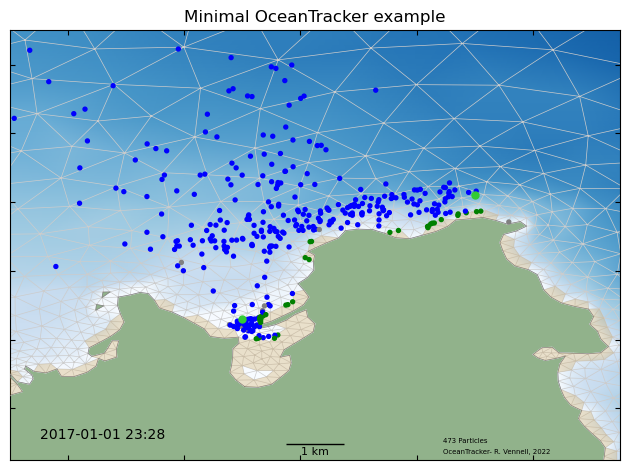

In [5]:
from IPython.display import HTML # show anmation in note book


from matplotlib import pyplot as plt
from oceantracker.post_processing.plotting.plot_tracks import animate_particles

# need to do amination in seperate window

# animate particles
anim = animate_particles(tracks, axis_lims=ax,title='Minimal OceanTracker example', 
                         show_dry_cells=True, show_grid=True, show=False) # use ipython to show video, rather than matplotlib plt.show()

# this is slow to build! 
HTML(anim.to_html5_video())